## Computational Intelligence: Theory and Applications (ACIT4620-1 22H)
**Lecturer:** Prof Jianhua Zhang<br>
**TA:** Michael Tarlton

## Project Title: “Prediction of Heart disease using hybrid artificial intelligence model”
Mohammad Azizul Islam Yasin (Candidet No: 504)

**Project Description:** Heart disease is the primary cause of death. There are various reasons for heart disease. When 
heart fails to function correctly brain and other organs also stop working. The buildup of plaques inside larger coronary arteries, molecular changes associated with aging, chronic inflammation, high blood pressure, and diabetes are all causes of and risk factors for heart disease. To identify and diagnosis heart disease in efficient way we are going to apply machine learning 
techniques like K-nearest Neighbor, Support vector Machine, Decision Tree, Random Forest and 
Neural Network then we will use Ensemble modeling to combine all results into a single score. 

**Dataset Description:** The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, we downloaded a csv of the dataset available on Kaggle. This dataset contains 253,680 survey responses from cleaned BRFSS to be used primarily for the binary classification of heart disease. Not that there is strong class imbalance in this dataset. 229,787 respondents do not have/have not had heart disease while 23,893 have had heart disease. There are 22 columns and the descriptions are given below:
<img src='Dataset details.png' />


**The whole project is divided into 9 sections:**
1. Data Collection (Loadind ant testing dataset)
2. Balancing Dataset
3. Exploriatory Analysis
4. Feature selection
5. scaling
6. Train and test split
7. Base Learner Algorithms
8. Building Stacked model
9. Results

# 1. Data Collection (Loadind ant testing dataset)

###### Importing libraries for handeling, analysing and ploting data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

###### Reading file from desktop

In [2]:
df_main = pd.read_csv("C:/Users/Yasin/Ensemble Learning/heart_disease.csv")

###### Checking the dataset

In [3]:
df_main.shape

(253680, 22)

In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df_main.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# 2. Balancing Dataset

###### We are curious to see how our model will work while it has balanced labeld data. Thats why we are taking 50% patient who have heart disease and 50% patient who don't have heart disease.

In [6]:
df_heartattack_positive = df_main[df_main['HeartDiseaseorAttack']==1]
df_heartattack_positive.shape

(23893, 22)

In [7]:
df_heartattack_neg = df_main[df_main['HeartDiseaseorAttack']==0]
df_heartattack_negative = df_heartattack_neg.sample(n=23893)

In [8]:
df = pd.concat([df_heartattack_positive, df_heartattack_negative], ignore_index=True)
df.shape

(47786, 22)

In [9]:
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
1,1.0,1.0,1.0,1.0,22.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,30.0,0.0,1.0,0.0,12.0,4.0,4.0
2,1.0,1.0,1.0,1.0,37.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,1.0,1.0,10.0,6.0,5.0
3,1.0,1.0,1.0,1.0,28.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,2.0,4.0
4,1.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,10.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47781,0.0,0.0,1.0,1.0,27.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,2.0,1.0,0.0,0.0,9.0,6.0,8.0
47782,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,4.0,4.0
47783,0.0,0.0,1.0,1.0,25.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,7.0
47784,0.0,1.0,0.0,1.0,63.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,5.0,30.0,1.0,1.0,6.0,3.0,5.0


# 3. Exploriatory Analysis

###### How many people are in the list who have heart attact or disease ?

<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

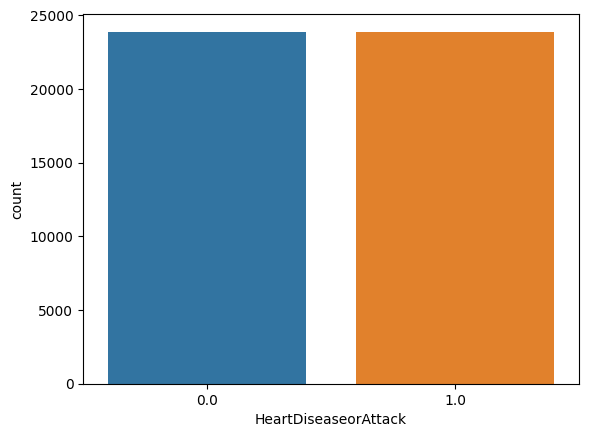

In [10]:
sns.countplot(x=df["HeartDiseaseorAttack"])

In [12]:
df["HeartDiseaseorAttack"].value_counts()

1.0    23893
0.0    23893
Name: HeartDiseaseorAttack, dtype: int64

In [13]:
df["HeartDiseaseorAttack"].value_counts().sum()

47786

###### which gender has most heart disease?

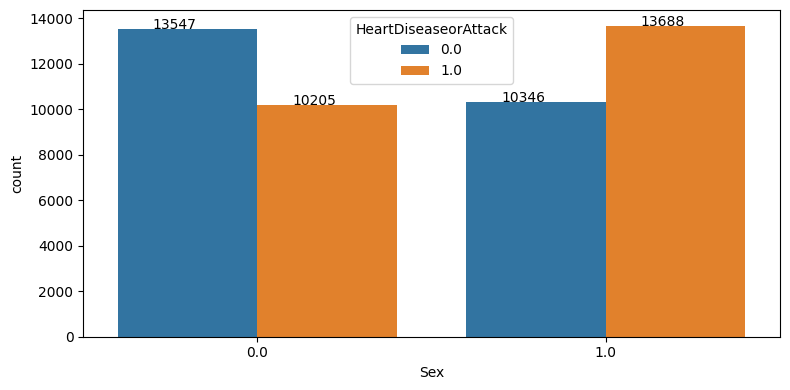

In [14]:
plt.rcParams["figure.figsize"] = [8.00, 4.0]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x ='Sex', hue = "HeartDiseaseorAttack", data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.8))

plt.show()

###### Which age is vulnarable for heart attack ?

###### We are trying to figure out the heart attack or disease of a child.

In [16]:
df['Age'].unique()

array([ 9., 12., 10., 11.,  7., 13.,  8.,  6.,  3.,  4.,  2.,  5.,  1.])

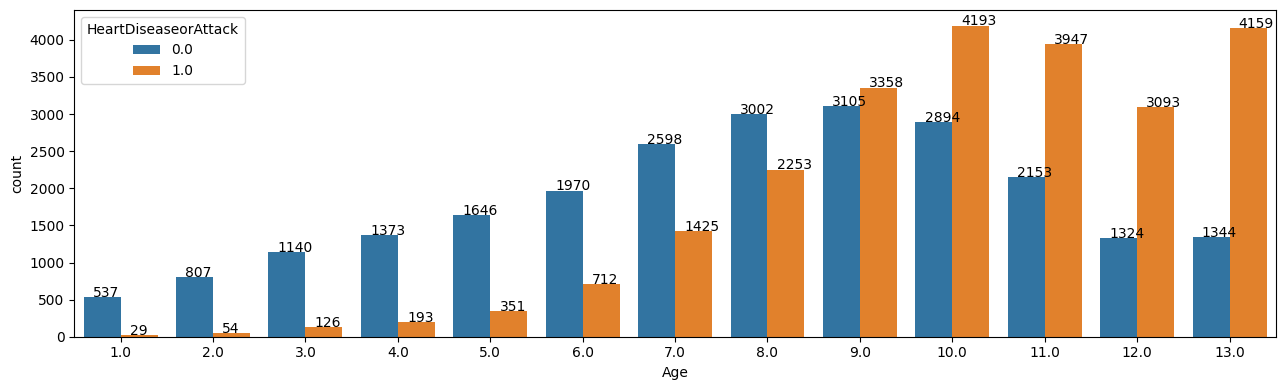

In [17]:
plt.rcParams["figure.figsize"] = [13.00, 4.0]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x ='Age', hue = "HeartDiseaseorAttack", data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.8))

plt.show()

# 4. Feature selection
The most correlated column with the heart disesase is "General Health" and Age, High BP are the 2nd and 3rd highest.

(22.5, -0.5)

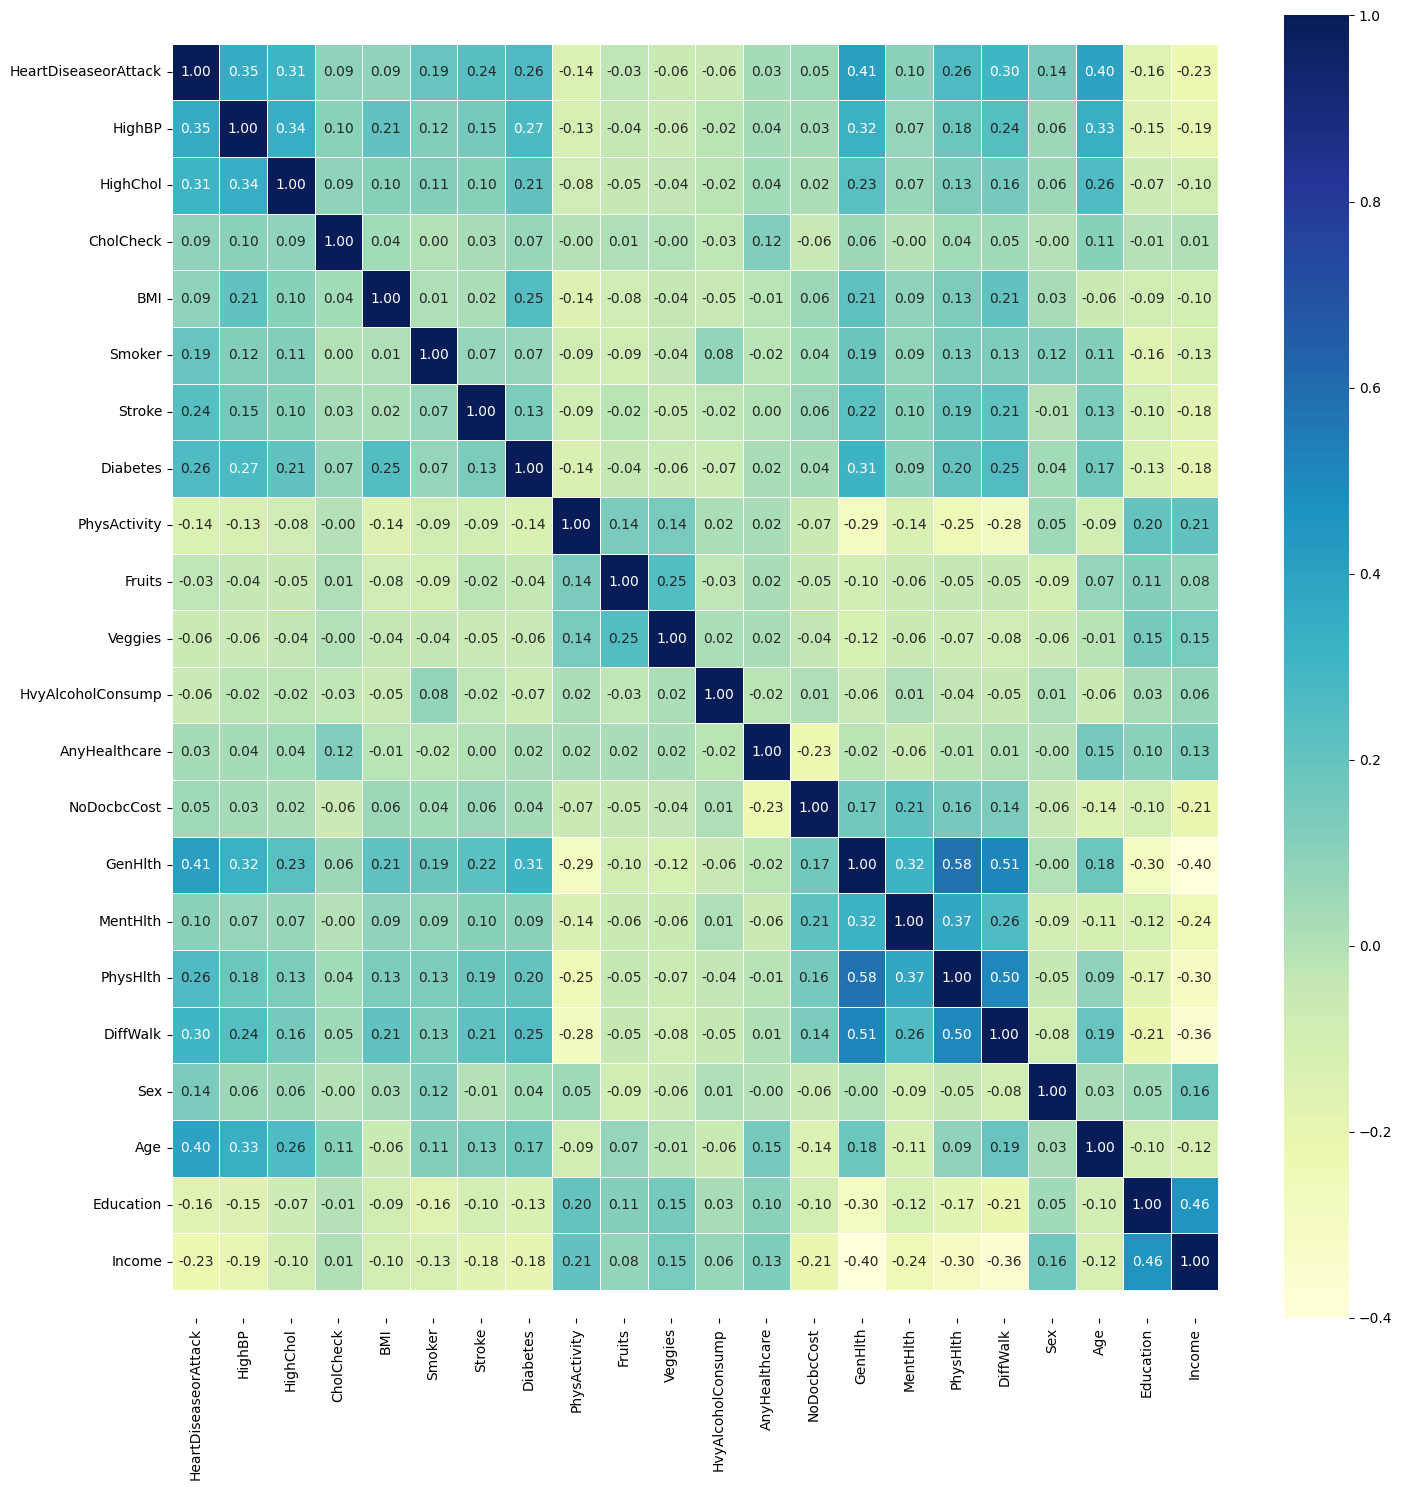

In [18]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [19]:
corr_df = pd.DataFrame(df.corrwith(df['HeartDiseaseorAttack']),columns=['HeartDiseaseorAttack']).dropna()
corr_df.sort_values(by=['HeartDiseaseorAttack'], ascending=False, inplace=True)
corr_df

,HeartDiseaseorAttack
HeartDiseaseorAttack,1.000000
GenHlth,0.407340
Age,0.396602
HighBP,0.354021
HighChol,0.306196
DiffWalk,0.302974
PhysHlth,0.256643
Diabetes,0.256362
Stroke,0.235198
Smoker,0.191363


We are dropping some less important features according to our correlation matrix 

In [20]:
df.drop(['NoDocbcCost', 'AnyHealthcare', 'PhysActivity', 'Education','Income'], axis=1, inplace=True)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,1.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0
1,1.0,1.0,1.0,1.0,22.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,30.0,0.0,1.0,0.0,12.0
2,1.0,1.0,1.0,1.0,37.0,1.0,1.0,2.0,0.0,1.0,0.0,5.0,0.0,0.0,1.0,1.0,10.0
3,1.0,1.0,1.0,1.0,28.0,1.0,0.0,2.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0
4,1.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,10.0


#  5. scaling

In [21]:
df_scale=df.drop('HeartDiseaseorAttack',axis=1)
df_scale

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,1.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0
1,1.0,1.0,1.0,22.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,30.0,0.0,1.0,0.0,12.0
2,1.0,1.0,1.0,37.0,1.0,1.0,2.0,0.0,1.0,0.0,5.0,0.0,0.0,1.0,1.0,10.0
3,1.0,1.0,1.0,28.0,1.0,0.0,2.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0
4,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47781,0.0,1.0,1.0,27.0,1.0,0.0,2.0,1.0,1.0,0.0,3.0,2.0,1.0,0.0,0.0,9.0
47782,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0
47783,0.0,1.0,1.0,25.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0
47784,1.0,0.0,1.0,63.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,5.0,30.0,1.0,1.0,6.0


###### Standardize the Variables

Because some classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, than variables that are on a small scale. Thats why we are scaling our data by by removing the mean and scaling to unit variance..

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_scale)
scaled_features = scaler.transform(df_scale)

#Cheking the scaled data
df_feat = pd.DataFrame(scaled_features,columns=df_scale.columns)
df_feat.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.859099,0.906727,0.160152,0.167148,0.953293,-0.325150,1.825962,0.784214,0.516586,-0.223115,1.820476,3.149680,2.233486,1.607244,-1.005919,0.005542
1,0.859099,0.906727,0.160152,-1.030020,-1.048995,3.075507,-0.565318,0.784214,-1.935786,-0.223115,0.089163,3.149680,-0.611497,1.607244,-1.005919,1.042645
2,0.859099,0.906727,0.160152,1.214671,0.953293,3.075507,1.825962,-1.275162,0.516586,-0.223115,1.820476,-0.463693,-0.611497,1.607244,0.994116,0.351243
3,0.859099,0.906727,0.160152,-0.132144,0.953293,-0.325150,1.825962,-1.275162,0.516586,-0.223115,0.954820,-0.463693,-0.611497,-0.622183,0.994116,1.042645
4,0.859099,0.906727,0.160152,-0.581082,0.953293,-0.325150,-0.565318,0.784214,0.516586,-0.223115,-0.776493,-0.343248,-0.611497,-0.622183,0.994116,0.351243


# 6. Train and test split

We have used 20% of our data for testing

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['HeartDiseaseorAttack'],
                                                    test_size=0.20, random_state=123)

In [24]:
X_train.shape, y_train.shape

((38228, 16), (38228,))

In [25]:
X_test.shape, y_test.shape

((9558, 16), (9558,))

# 7. Base Learner Algorithms

###### Importing some libraries for checking accuracy

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

###### K nearest neighbors

We used 3 neighbour and k-dimensional tree

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'kd_tree') # Define classifier
knn.fit(X_train, y_train) # Train model and Number of neighbors is 3

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

Model performance for Training set
- Accuracy: 0.8435963168358271
- MCC: 0.687412111968835
- F1 score: 0.8435593369365137
----------------------------------
Model performance for Test set
- Accuracy: 0.7204436074492572
- MCC: 0.44135863576618967
- F1 score: 0.7204265686310277


###### Support vector machine (Radial basis function kernel)

We have used Radial basis function kernel and gamma scale

In [28]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel = 'rbf', gamma=2, C=2)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)

Model performance for Training set
- Accuracy: 0.9183844302605421
- MCC: 0.8368808942136642
- F1 score: 0.9183757300049208
----------------------------------
Model performance for Test set
- Accuracy: 0.7067378112575853
- MCC: 0.42512911093682626
- F1 score: 0.7037824033184918


###### Decision tree

for splitting we have used gini and max depth is set to 10

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'gini', max_depth=10) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.7915663911269226
- MCC: 0.584584674321143
- F1 score: 0.7912579841425692
----------------------------------
Model performance for Test set
- Accuracy: 0.7491106926135175
- MCC: 0.5010558027767095
- F1 score: 0.7487254757247314


###### Random forest

We have used 40 trees for estimator and again gini is used for spliting and max depth is set to 40

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=40, criterion = 'gini', max_depth = 40) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 0.9746520874751491
- MCC: 0.9493043893306888
- F1 score: 0.9746521349493923
----------------------------------
Model performance for Test set
- Accuracy: 0.7379158819836786
- MCC: 0.4772818653207533
- F1 score: 0.7377566795966128


###### Neural network

we have used 2 hidden layer and each with 10 nodes. Used rectified linear activation unit as an activation function for hidden layer.
we used adam optimizer for updating weights. and used L2 regularization. Maximum iteration is set to 20

In [31]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(batch_size=2000, hidden_layer_sizes = (2,10), activation = 'relu',
                   solver = 'adam', alpha= 0.01, max_iter=20)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)

Model performance for Training set
- Accuracy: 0.7418907606989641
- MCC: 0.49023270247156936
- F1 score: 0.7400281994048672
----------------------------------
Model performance for Test set
- Accuracy: 0.7380205063820883
- MCC: 0.4844086265725717
- F1 score: 0.7364181186858655


C:\Users\Yasin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


# 8. Building Stacked model

We used LogisticRegression to combine the base estimators

In [32]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

C:\Users\Yasin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Yasin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Yasin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Yasin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimiza

Model performance for Training set
- Accuracy: 0.8488804017997279
- MCC: 0.6984025760005204
- F1 score: 0.8487925756055062
----------------------------------
Model performance for Test set
- Accuracy: 0.7594685080560787
- MCC: 0.5206468441308524
- F1 score: 0.7592925989383235


# 9. Results

###### Training Result

In [33]:
acc_train_list = {'knn':knn_train_accuracy,
'svm_rbf': svm_rbf_train_accuracy,
'dt': dt_train_accuracy,
'rf': rf_train_accuracy,
'mlp': mlp_train_accuracy,
'stack': stack_model_train_accuracy}

mcc_train_list = {'knn':knn_train_mcc,
'svm_rbf': svm_rbf_train_mcc,
'dt': dt_train_mcc,
'rf': rf_train_mcc,
'mlp': mlp_train_mcc,
'stack': stack_model_train_mcc}

f1_train_list = {'knn':knn_train_f1,
'svm_rbf': svm_rbf_train_f1,
'dt': dt_train_f1,
'rf': rf_train_f1,
'mlp': mlp_train_f1,
'stack': stack_model_train_f1}

acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

,Accuracy,MCC,F1
knn,0.843596,0.687412,0.843559
svm_rbf,0.918384,0.836881,0.918376
dt,0.791566,0.584585,0.791258
rf,0.974652,0.949304,0.974652
mlp,0.741891,0.490233,0.740028
stack,0.848880,0.698403,0.848793


<AxesSubplot:>

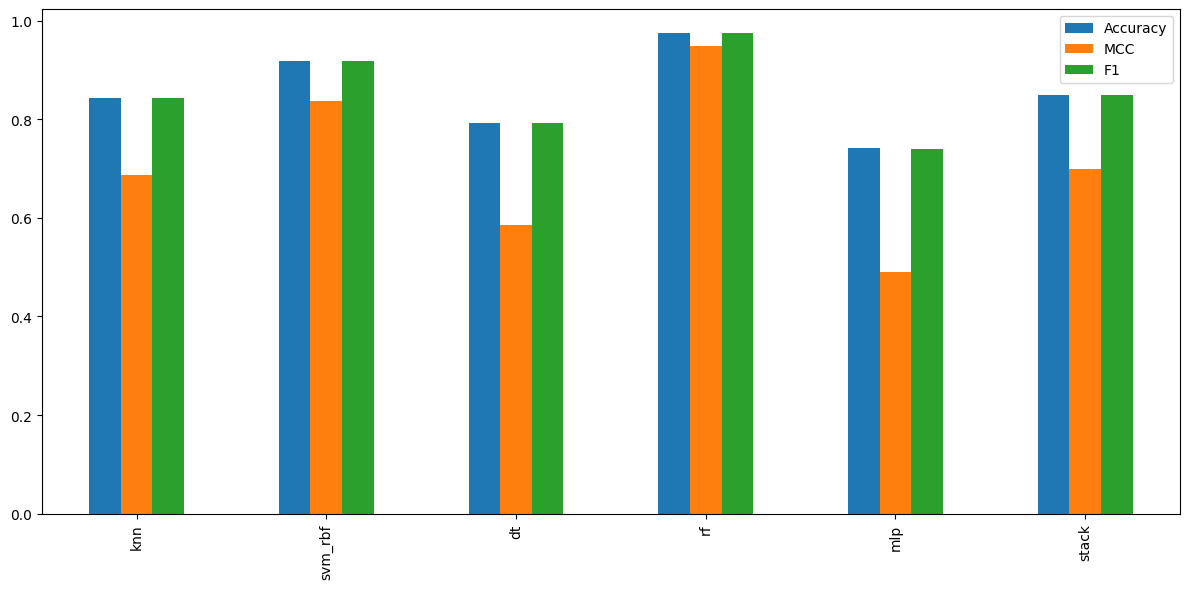

In [34]:
df.plot(kind="bar", figsize = (12, 6))

###### Testing Result

Though our stacking model was not performing well in the traing data (compared to others) but in testing data it has the highest accuracy

In [35]:
acc_test_list = {'knn':knn_test_accuracy,
'svm_rbf': svm_rbf_test_accuracy,
'dt': dt_test_accuracy,
'rf': rf_test_accuracy,
'mlp': mlp_test_accuracy,
'stack': stack_model_test_accuracy}

mcc_test_list = {'knn':knn_test_mcc,
'svm_rbf': svm_rbf_test_mcc,
'dt': dt_test_mcc,
'rf': rf_test_mcc,
'mlp': mlp_test_mcc,
'stack': stack_model_test_mcc}

f1_test_list = {'knn':knn_test_f1,
'svm_rbf': svm_rbf_test_f1,
'dt': dt_test_f1,
'rf': rf_test_f1,
'mlp': mlp_test_f1,
'stack': stack_model_test_f1}

acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_test_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df


,Accuracy,MCC,F1
knn,0.720444,0.441359,0.720427
svm_rbf,0.706738,0.425129,0.703782
dt,0.749111,0.501056,0.748725
rf,0.737916,0.477282,0.737757
mlp,0.738021,0.484409,0.736418
stack,0.759469,0.520647,0.759293


<AxesSubplot:>

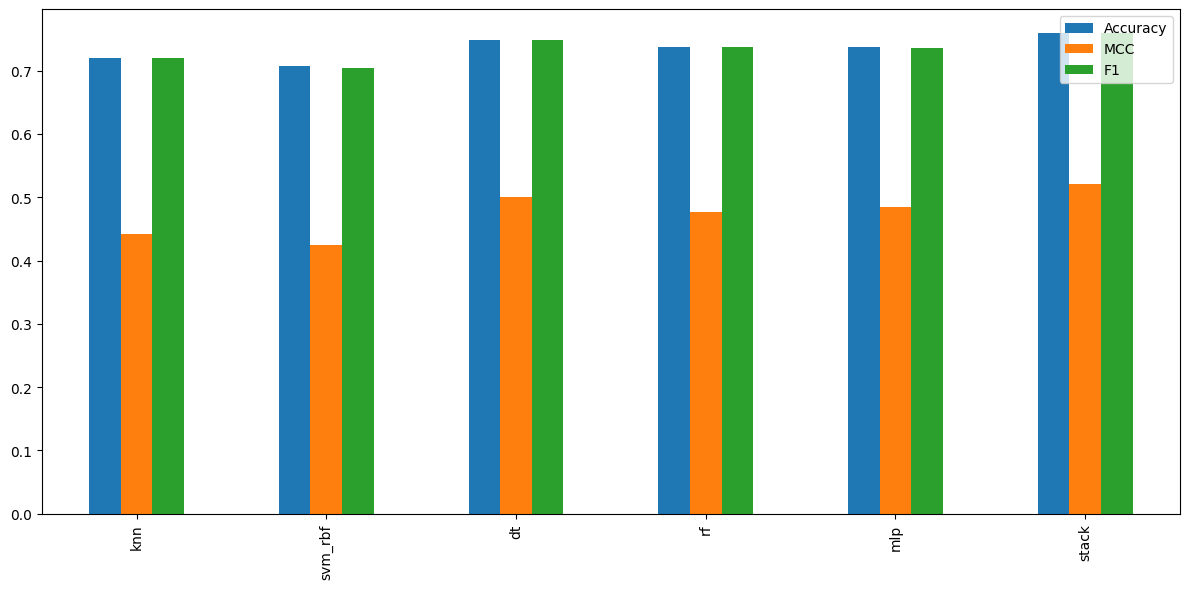

In [36]:
df.plot(kind="bar", figsize = (12, 6))